In [26]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import json
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [4]:
recom = ["재밌는 영화 추천해 주세요!", # 추천
"요즘 볼 만한 영화 뭐 있을까요?",
"감동적인 영화 추천 부탁드려요.",
"액션 영화 중에 추천할 만한 거 있을까요?",
"코미디 영화 추천해 주세요!",
"로맨틱한 영화 보고 싶은데, 추천 좀요!",
"SF 영화 추천해 주실 수 있나요?",
"스릴러 영화 추천 부탁드립니다.",
"가족끼리 볼 만한 영화 추천해 주세요.",
"최근 개봉한 영화 중에 추천할 만한 거 있나요?",
"고전 영화 추천 좀 해주세요.",
"애니메이션 영화 추천 부탁드려요.",
"공포 영화 추천해 주세요!",
"드라마 장르 영화 추천 부탁드립니다.",
"다큐멘터리 영화 중에 추천할 만한 거 있나요?",
"음악 영화 추천해 주세요!",
"판타지 영화 추천 부탁드려요.",
"마음을 따뜻하게 해주는 영화 추천해 주세요.",
"독립 영화 중에서 추천해 주실 만한 거 있나요?",
"실화 바탕 영화 추천 부탁드립니다.",
"최근에 SF 영화를 봤는데 이런 부류 영화 추천해줘",
"최근에 나온 영화 추천해줘",
"최신 영화 추천해줘",
"시리즈물 추천해줄래?",
"호러 영화 추천해줘",
"학교 영화 추천해줄래?",
"대부분이 좋아하는 영화 알려줘",
"옛날에 인기있던 영화 있으면 알려줘",
"상영시간이 짧은 영화를 추천해줘",
"주인공이 악당인 영화 추천해줘",
"나한테 재밌는 영화를 권해줄래?",
"세상을 지배하거나 당하는 영화를 추천해줘",
"열린 결말의 영화를 추천해줘",
"감동적인 영화를 추천해줄래?",
"혹시 독립 영화중 추천할 영화가 있어? 있으면 추천해줘"
,"재밌는 영화 추천해 주세요!"
,"요즘 볼 만한 영화 뭐 있을까요?"
,"감동적인 영화 추천 부탁드려요."
,"액션 영화 중에 추천할 만한 거 있을까요?"
,"코미디 영화 추천해 주세요!"
,"로맨틱한 영화 보고 싶은데, 추천 좀요!"
,"SF 영화 추천해 주실 수 있나요?"
,"스릴러 영화 추천 부탁드립니다."
,"가족끼리 볼 만한 영화 추천해 주세요."
,"최근 개봉한 영화 중에 추천할 만한 거 있나요?"
,"고전 영화 추천 좀 해주세요."
,"애니메이션 영화 추천 부탁드려요."
,"공포 영화 추천해 주세요!"
,"드라마 장르 영화 추천 부탁드립니다."
,"다큐멘터리 영화 중에 추천할 만한 거 있나요?"
,"음악 영화 추천해 주세요!"
,"판타지 영화 추천 부탁드려요."
,"마음을 따뜻하게 해주는 영화 추천해 주세요."
,"독립 영화 중에서 추천해 주실 만한 거 있나요?"
,"실화 바탕 영화 추천 부탁드립니다."
,"여자 주인공이 멋진 영화 추천해 주세요."
# ,"최근 유행하는 영화 장르 추천해 주세요."
,"친구랑 함께 보기 좋은 영화 추천 부탁드립니다."
,"감성적인 영화 추천해 주실 수 있나요?"
,"전쟁 영화 중에서 추천할 만한 거 있나요?"
,"여름에 잘 어울리는 영화 추천해 주세요."
,"재미있고 가벼운 영화 추천 부탁드립니다."
,"어린이와 함께 볼 수 있는 영화 추천해 주세요."
,"여행을 떠나고 싶게 만드는 영화 추천 부탁드립니다."
,"시리즈물 중에서 추천할 만한 거 있나요?"
,"인생을 돌아보게 하는 영화 추천해 주세요."
,"비극적인 사랑 이야기를 다룬 영화 추천 부탁드려요."
,"여름 방학에 보기 좋은 영화 추천해 주세요."
,"숨겨진 명작 영화 추천 부탁드립니다."
,"사랑과 우정이 동시에 그려진 영화 추천해 주세요."
,"미스터리한 요소가 있는 영화 추천 부탁드립니다."
,"어른들이 보기 좋은 애니메이션 영화 추천해 주세요."
,"가족 간의 사랑을 다룬 영화 추천해 주실 수 있나요?"
,"우주를 배경으로 한 영화 추천 부탁드려요."
,"감정 이입이 잘 되는 영화 추천해 주세요."
,"미래를 다룬 SF 영화 추천 부탁드립니다."
# ,"인물 중심의 드라마 영화 추천해 주세요."
,"부모와 자녀의 관계를 다룬 영화 추천 부탁드립니다."
,"사회적 메시지가 있는 영화 추천해 주세요."
,"온 가족이 함께 보기 좋은 영화 추천 부탁드립니다."
,"전문 직업을 다룬 영화 추천해 주세요."
,"재미있고 감동적인 애니메이션 추천 부탁드립니다."
,"여행과 모험이 담긴 영화 추천해 주세요."
,"신비로운 요소가 있는 판타지 영화 추천 부탁드립니다."
,"소소한 일상 속의 이야기를 다룬 영화 추천해 주세요."
,"재미있는 다큐멘터리 영화 추천해 주세요!"
# ,"최근에 감명 깊게 본 영화가 있으면 추천 부탁드립니다."
,"액션과 로맨스가 결합된 영화 추천해 주세요."
,"가장 감동적인 애니메이션 영화 추천 부탁드려요."
,"시간 여행을 다룬 영화 추천해 주실 수 있나요?"
,"온가족이 함께 즐길 수 있는 영화 추천해 주세요."
,"여름에 잘 어울리는 코미디 영화 추천 부탁드립니다."
,"가슴 아픈 사랑 이야기를 다룬 영화 추천해 주세요."
,"실화를 바탕으로 한 감동적인 드라마 추천해 주세요."
,"기발한 설정의 SF 영화 추천 부탁드립니다."
,"추억을 자극하는 고전 애니메이션 추천해 주세요."
# ,"가장 인상 깊었던 외국 영화 추천 부탁드립니다."
,"심리적 긴장이 느껴지는 영화 추천해 주세요."
,"사랑에 관한 다양한 시각을 다룬 영화 추천 부탁드립니다."
,"주인공이 강력한 여성인 영화 추천해 주세요."
,"비극적인 이야기지만 아름다운 영화 추천 부탁드립니다."
,"가족 간의 갈등을 다룬 영화 추천해 주세요."
,"우정의 소중함을 느낄 수 있는 영화 추천 부탁드립니다."
,"복수극을 다룬 스릴러 영화 추천해 주세요."
,"소소한 일상을 그린 따뜻한 영화 추천 부탁드립니다."
,"재미있고 교육적인 애니메이션 추천해 주세요."
,"여행과 모험이 결합된 영화 추천 부탁드립니다."
,"미래 사회를 다룬 영화 추천해 주세요."
,"복잡한 스토리를 가진 영화 추천 부탁드립니다."
,"사랑과 우정의 경계를 다룬 영화 추천해 주세요."
,"인생의 의미를 찾아가는 이야기 추천 부탁드립니다."
,"자연과 환경을 주제로 한 영화 추천해 주세요."
# ,"가장 기억에 남는 명작 영화 추천 부탁드립니다."
,"전통 문화를 다룬 영화 추천해 주세요."
,"사회적 이슈를 다룬 강렬한 드라마 추천 부탁드립니다."
,"어릴 적 기억을 떠올리게 하는 영화 추천해 주세요."
,"희망적인 메시지를 담은 영화 추천 부탁드립니다."
,"유머와 감동이 함께하는 영화 추천해 주세요."
,"정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다."
# ,"가장 기대되는 개봉 예정 영화 추천해 주세요."
,"폭력과 정의를 다룬 영화 추천 부탁드립니다."
# ,"주인공이 특별한 능력을 가진 영화 추천해 주세요."
,"가장 아름다운 사랑 이야기를 다룬 영화 추천 부탁드립니다."
,"여행 중의 우연한 만남을 다룬 영화 추천해 주세요."
,"실험적인 형식을 가진 영화 추천 부탁드립니다."
,"우정이 깊어지는 과정을 그린 영화 추천 부탁드립니다."
,"주인공이 성장하는 과정을 담은 영화 추천해 주세요."
,"어두운 분위기의 스릴러 영화 추천 부탁드립니다."
,"눈물을 자아내는 감동적인 드라마 추천해 주세요."
# ,"가장 독창적인 스토리를 가진 영화 추천 부탁드립니다."
,"가족의 사랑을 그린 따뜻한 영화 추천해 주세요."
,"자아찾기 여정을 담은 영화 추천 부탁드립니다."
,"사랑을 다룬 다양한 시각의 영화 추천해 주세요."
,"고전 문학을 바탕으로 한 영화 추천 부탁드립니다."
,"가장 기억에 남는 명대사가 있는 영화 추천해 주세요."
,"재미있는 스릴러 영화 추천해 주세요!"
# ,"최신 개봉작 중 추천할 만한 영화 있나요?"
,"가슴 따뜻해지는 가족 영화 추천 부탁드립니다."
,"여름에 보기 좋은 해변 영화 추천해 주세요."
,"기분 전환이 되는 코미디 영화 추천 부탁드립니다."
,"여행과 모험이 가득한 영화 추천해 주세요."
,"전쟁을 다룬 감동적인 영화 추천 부탁드립니다."
,"자연을 배경으로 한 아름다운 영화 추천해 주세요."
,"소설을 원작으로 한 영화 추천 부탁드립니다."
,"여자 주인공이 강한 영화 추천해 주세요."
,"가장 감동적인 실화 영화 추천 부탁드립니다."
,"추억의 명작 애니메이션 추천해 주세요."
,"사랑이 주제인 아름다운 영화 추천 부탁드립니다."
# ,"가장 기대되는 외국 영화 추천해 주세요."
,"자아 발견을 다룬 영화 추천 부탁드립니다."
,"소소한 일상을 그린 유머가 있는 영화 추천해 주세요."
,"시대극을 다룬 영화 추천 부탁드립니다."
,"스포츠를 주제로 한 감동적인 영화 추천해 주세요."
,"고전 문학을 바탕으로 한 영화 추천 부탁드립니다."
,"가장 재미있는 판타지 영화 추천해 주세요."
,"심리적 긴장이 느껴지는 스릴러 영화 추천 부탁드립니다."
,"다양한 문화가 어우러진 영화 추천해 주세요."
,"음악과 춤이 함께하는 영화 추천 부탁드립니다."
,"가족 간의 사랑을 다룬 영화 추천해 주세요."
,"인생의 전환점을 그린 영화 추천 부탁드립니다."
# ,"가장 기억에 남는 애니메이션 추천해 주세요."
,"고전 영화 중에서 추천할 만한 거 있나요?"
,"가장 슬픈 영화 추천 부탁드립니다."
,"서스펜스가 가득한 영화 추천해 주세요."
,"주인공이 특별한 능력을 가진 영화 추천 부탁드립니다."
,"어린이와 함께 보기 좋은 애니메이션 추천 부탁드립니다."
,"사랑과 우정의 경계를 다룬 영화 추천 부탁드립니다."
,"미래 사회를 그린 SF 영화 추천해 주세요."
,"가장 독창적인 시나리오를 가진 영화 추천 부탁드립니다."
,"유머와 감동이 함께하는 영화 추천해 주세요."
,"온 가족이 함께 즐길 수 있는 영화 추천 부탁드립니다."
,"여행 중의 특별한 순간을 다룬 영화 추천 부탁드립니다."
# ,"가장 인상 깊었던 외국 영화 추천해 주세요."
,"초자연적인 요소가 있는 영화 추천 부탁드립니다."
,"심리적 갈등을 다룬 영화 추천 부탁드립니다."
# ,"가장 기억에 남는 명대사가 있는 영화 추천해 주세요."
,"재미있고 교육적인 다큐멘터리 추천해 주세요."
,"주인공이 성장하는 과정을 담은 영화 추천 부탁드립니다."
,"감정 이입이 잘 되는 영화 추천 부탁드립니다."
,"모험과 판타지가 가득한 영화 추천 부탁드립니다."
,"정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다."
# ,"가장 기대되는 개봉 예정 영화 추천해 주세요."
,"사랑에 관한 다양한 시각을 다룬 영화 추천 부탁드립니다."
,"여름 방학에 보기 좋은 영화 추천해 주세요."
,"가장 아름다운 사랑 이야기를 다룬 영화 추천 부탁드립니다."
,"사회적 이슈를 다룬 강렬한 드라마 추천해 주세요."
,"우정의 소중함을 느낄 수 있는 영화 추천 부탁드립니다."
,"가장 재미있는 코미디 영화 추천해 주세요."
,"여행을 떠나고 싶게 만드는 영화 추천 부탁드립니다."
,"전통 문화를 다룬 영화 추천해 주세요."
,"가장 독창적인 스토리를 가진 영화 추천 부탁드립니다."
,"실험적인 형식을 가진 영화 추천 부탁드립니다."
,"인상 깊은 캐릭터가 있는 영화 추천해 주세요."
,"가족 간의 갈등을 다룬 영화 추천 부탁드립니다."
,"우정이 깊어지는 과정을 그린 영화 추천해 주세요."
,"사회적 메시지를 담은 영화 추천 부탁드립니다."
,"어두운 분위기의 스릴러 영화 추천 부탁드립니다."
,"가장 감동적인 다큐멘터리 영화 추천해 주세요."
# ,"가장 기억에 남는 명작 영화 추천 부탁드립니다."
# ,"주인공이 특별한 능력을 가진 영화 추천해 주세요."
,"사랑을 다룬 다양한 시각의 영화 추천 부탁드립니다."
# ,"가장 기대되는 애니메이션 영화 추천해 주세요."
,"가장 슬픈 사랑 이야기를 다룬 영화 추천 부탁드립니다."
,"여행과 모험이 가득한 영화 추천 부탁드립니다."
# ,"복잡한 스토리를 가진 영화 추천해 주세요."
,"어린이와 함께 보기 좋은 가족 영화 추천해 주세요."
,"사랑과 우정이 동시에 그려진 영화 추천 부탁드립니다."
,"가장 독창적인 캐릭터가 있는 영화 추천해 주세요."
# ,"가장 인상 깊은 외국 애니메이션 추천 부탁드립니다."
,"가장 슬픈 애니메이션 영화 추천해 주세요."
,"여행 중의 우연한 만남을 다룬 영화 추천 부탁드립니다."
# ,"가장 기대되는 개봉작 중 추천해 주세요."
,"가족의 사랑을 그린 따뜻한 영화 추천 부탁드립니다."
,"가장 재미있는 판타지 애니메이션 추천 부탁드립니다."
,"사랑과 갈등을 다룬 영화 추천해 주세요."
,"가장 감동적인 실화 바탕의 영화 추천 부탁드립니다."
,"온 가족이 함께 보기 좋은 영화 추천해 주세요."
,"가장 기억에 남는 감동적인 애니메이션 추천 부탁드립니다."
,"주인공이 강력한 여성인 영화 추천해 주세요."
,"여행과 모험이 결합된 영화 추천 부탁드립니다."
,"가장 인상 깊었던 다큐멘터리 영화 추천 부탁드립니다."
# ,"사랑과 우정의 경계를 다룬 영화 추천해 주세요."
,"어두운 분위기의 스릴러 영화 추천 부탁드립니다."
# ,"가장 기대되는 외국 애니메이션 추천 부탁드립니다."
,"사랑과 갈등을 다룬 드라마 영화 추천 부탁드립니다."
# ,"가장 기억에 남는 감동적인 영화 추천해 주세요."
]

In [14]:
# 추천아닌 질문글
ch=["안녕하세요! 오늘 날씨가 정말 좋네요. 어떻게 지내세요?"
,"최근에 어떤 영화 보셨나요? 재미있었나요?"
,"주말 계획은 무엇인가요? 특별한 일 있으신가요?"
,"요즘 어떤 책 읽고 계세요? 추천해 주실 만한 책이 있나요?"
,"최근에 새로운 취미를 시작하셨나요? 어떤 건가요?"
,"가장 기억에 남는 여행지는 어디인가요? 그곳의 매력은 무엇이었나요?"
,"요즘 스트레스 해소를 위해 어떤 활동을 하고 계세요?"
,"친구들과의 만남은 자주 가지시나요? 어떤 활동을 즐기시나요?"
,"최근에 맛있었던 음식이 있나요? 어디서 드셨나요?"
,"자주 가는 카페나 맛집 추천해 주실 수 있나요?"
,"지금 하고 있는 일이 만족스러우신가요? 어떤 점이 좋으세요?"
,"최근에 들은 음악 중에서 인상 깊었던 곡이 있나요?"
,"가족과의 시간은 어떻게 보내고 계세요? 특별한 전통이 있나요?"
,"자주 보는 TV 프로그램이나 드라마가 있나요? 어떤 내용인가요?"
,"여행 가고 싶은 곳이 있다면 어디인가요? 그 이유는 무엇인가요?"
,"어렸을 때의 꿈은 무엇이었나요? 지금의 직업과 관련이 있나요?"
,"주말에 보통 어떻게 시간을 보내세요? 특별한 루틴이 있나요?"
,"최근에 참여한 행사나 모임이 있다면 어떤 것이었나요?"
,"취미 활동 중 가장 즐거운 것은 무엇인가요? 왜 그렇게 느끼시나요?"
,"날씨가 추워지면 어떤 활동을 하고 싶으신가요?"
,"가장 좋아하는 계절은 무엇인가요? 그 계절의 매력은 무엇인가요?"
,"아침에 일어나서 가장 먼저 하는 일이 무엇인가요?"
,"여행 중에 겪었던 에피소드가 있다면 나눠주실 수 있나요?"
,"특별한 기념일을 어떻게 기념하시나요? 특별한 전통이 있나요?"
,"어떤 종류의 영화를 가장 좋아하시나요? 그 이유는 무엇인가요?"
,"최근에 읽은 기사나 뉴스 중 인상 깊었던 내용이 있나요?"
,"친구와의 소중한 기억 중 하나를 나눠주실 수 있나요?"
,"가장 좋아하는 운동이나 스포츠는 무엇인가요? 자주 하시나요?"
,"여가 시간에 가장 즐기는 활동은 무엇인가요?"
,"가장 좋아하는 과일이나 음식은 무엇인가요? 그 이유는 무엇인가요?"
,"다른 나라의 문화 중에 흥미로운 점이 있다면 어떤 것이었나요?"
,"최근에 배운 새로운 기술이나 정보가 있다면 나눠주실 수 있나요?"
,"가장 좋아하는 계절 음식이 있다면 어떤 것인가요?"
,"최근에 본 공연이나 전시회가 있다면 어땠나요?"
,"가장 기억에 남는 학생 시절의 추억은 무엇인가요?"
,"가장 좋아하는 명절은 무엇인가요? 그 이유는 무엇인가요?"
,"가족과의 특별한 순간을 나눠주실 수 있나요?"
,"어떤 방식으로 스트레스를 해소하시나요? 효과적인 방법이 있나요?"
,"가장 좋아하는 색깔은 무엇인가요? 그 이유는 무엇인가요?"
,"최근에 배운 요리나 레시피가 있다면 공유해 주실 수 있나요?"
,"자신에게 가장 큰 영향을 준 사람은 누구인가요? 그 이유는 무엇인가요?"
,"가장 좋아하는 동물은 무엇인가요? 그 이유는 무엇인가요?"
,"어떤 종류의 기념품을 수집하시나요? 특별한 의미가 있나요?"
,"가장 좋아하는 휴양지나 해변은 어디인가요? 그곳의 매력은 무엇인가요?"
,"최근에 시도해본 새로운 경험이 있다면 어떤 것이었나요?"
,"가장 좋아하는 패션 스타일이나 아이템이 있다면 무엇인가요?"
,"가장 감명 깊었던 강연이나 발표가 있다면 어떤 내용이었나요?"
,"가장 좋아하는 역사적 인물은 누구인가요? 그 이유는 무엇인가요?"
,"최근에 친구와 나눈 대화 중 기억에 남는 내용이 있나요?"
,"가장 좋아하는 향수나 향기는 무엇인가요?"
,"최근에 배운 새로운 언어가 있다면 어떤 것인가요? 배우는 과정은 어땠나요?"
,"어떤 종류의 전통 음식이 가장 좋아하시나요? 그 이유는 무엇인가요?"
,"가장 인상 깊었던 강의나 수업이 있다면 어떤 것이었나요?"
,"여름과 겨울 중 어느 계절을 더 좋아하시나요? 그 이유는 무엇인가요?"
,"어떤 방식으로 친구들과 소통하시나요? 자주 만나는 편인가요?"
,"가장 좋아하는 영화 장르는 무엇인가요? 그 장르의 매력은 무엇인가요?"
,"최근에 참여한 봉사활동이 있다면 어떤 것이었나요?"
,"가장 좋아하는 운동 선수나 팀이 있다면 누구인가요? 왜 좋아하시나요?"
,"어떤 종류의 예술 작품을 좋아하시나요? 최근에 본 작품이 있다면 어떤 것이었나요?"
,"가장 기억에 남는 생일 파티는 언제였나요? 특별한 순간이 있었나요?"
,"가족과의 특별한 여행이 있다면 어떤 것이었나요?"
,"어떤 종류의 게임을 즐기시나요? 요즘 자주 하는 게임이 있나요?"
,"가장 좋아하는 만화나 애니메이션은 무엇인가요? 그 이유는 무엇인가요?"
,"최근에 경험한 가장 큰 도전은 무엇이었나요? 어떻게 극복하셨나요?"
,"가장 좋아하는 자연 경관은 어디인가요? 그곳의 매력을 설명해 주세요."
,"어떤 종류의 커피나 음료를 좋아하시나요? 특별한 레시피가 있나요?"
,"가장 좋아하는 패션 브랜드나 디자이너는 누구인가요? 그 이유는 무엇인가요?"
,"어떤 방식으로 자기 계발을 하고 계신가요? 최근에 시도한 방법이 있다면?"
,"가장 좋아하는 TV 프로그램이나 유튜브 채널이 있다면 어떤 것인가요?"
,"어떤 방식으로 새로운 정보를 습득하시나요? 추천할 만한 자료가 있나요?"
,"최근에 겪었던 재미있는 에피소드가 있다면 나눠주실 수 있나요?"
,"가장 좋아하는 사진 촬영 장소는 어디인가요? 그 이유는 무엇인가요?"
,"어떤 방식으로 친구들과의 관계를 유지하시나요? 특별한 팁이 있나요?"
,"최근에 시도해본 새로운 레시피가 있다면 어떤 것이었나요?"
,"가장 좋아하는 스포츠 활동은 무엇인가요? 자주 하시나요?"
,"어떤 종류의 패션 아이템이 가장 소중하신가요? 그 이유는 무엇인가요?"
,"가장 감명 깊었던 여행의 순간이 있다면 어떤 것이었나요?"
,"가장 좋아하는 과목은 무엇인가요? 그 과목의 매력은 무엇인가요?"
,"어떤 방식으로 일상 속에서 행복을 찾으시나요?"
,"최근에 만난 사람 중 기억에 남는 인물이 있다면 누구인가요?"
,"가장 좋아하는 소설가나 작가는 누구인가요? 그 이유는 무엇인가요?"
,"어떤 종류의 공예나 DIY 활동을 즐기시나요? 최근에 만든 작품이 있다면?"
,"가장 기억에 남는 수업이나 과제는 무엇이었나요? 그 이유는 무엇인가요?"
,"어떤 방식으로 스트레스를 관리하시나요? 추천할 만한 방법이 있나요?"
,"가장 좋아하는 동화나 전래동화는 무엇인가요? 그 이야기가 주는 교훈은 무엇인가요?"
,"최근에 본 다큐멘터리 중 인상 깊었던 내용이 있다면 무엇인가요?"
,"가장 좋아하는 축제나 행사에 대해 이야기해 주실 수 있나요?"
,"어떤 방식으로 미래에 대한 계획을 세우시나요? 특별한 팁이 있나요?"
,"가장 좋아하는 향수나 스킨케어 제품은 무엇인가요? 그 이유는 무엇인가요?"
,"가족과의 특별한 전통이나 습관이 있다면 무엇인가요?"
,"어떤 방식으로 건강을 관리하시나요? 최근에 시도한 방법이 있다면?"
,"가장 기억에 남는 선물은 무엇인가요? 그 선물이 특별한 이유는 무엇인가요?"
,"어떤 방식으로 새로운 친구를 사귀시나요? 특별한 경험이 있다면?"
,"가장 좋아하는 아이스크림 맛은 무엇인가요? 그 이유는 무엇인가요?"
,"어떤 종류의 운동을 즐기시나요? 최근에 도전한 운동이 있다면?"
,"가장 좋아하는 웹툰이나 만화책은 무엇인가요? 그 이유는 무엇인가요?"
,"어떤 방식으로 자신의 감정을 표현하시나요? 특별한 방법이 있나요?"
,"가장 좋아하는 차나 음료는 무엇인가요? 그 이유는 무엇인가요?"
,"최근에 본 공연이나 콘서트 중 기억에 남는 것이 있다면?"
,"가장 좋아하는 자연 활동은 무엇인가요? 자주 하시는 편인가요?"
,"오늘 졸리네", 
"오늘 뭐 먹을까?", 
"오늘 덥다", 
"머리 아파", 
"졸리다", 
"재밌는 거 있어?", 
"청소하니 힘들다", 
"카페라떼가 맛있더라", 
"짜장면도 좋아", 
"입이 심심하다", 
"냄새나는 거 같아", 
"어깨가 결려", 
"300이라는 영화 재밌더라", 
"범죄도시 영화가 재밌더라", 
"목말라",
"호러 영화를 보면 무섭지 않아?",
"SF 영화는 역시 아이언맨이 최고인거 같아",
"영화는 결말이 중요한 거 같아",
"노래방 가고 싶다",
"술 한잔 마시고 싶다",
"치맥이나 먹고 싶다",
"공부하기 힘들다",
"조금 전에 대지진이 있었던 거 같아",
"새가 되어 날아가고 싶어",
"내가 돌아왔다",
"식당가서 먹으면 시원하겠지?",
"코만도 게임이 재밌었는데...",
"전에 메이즈 러너를 봤는데 감명 깊었어",
"단 거 먹고 싶다",
"지금 여름이라 그런지 너무 더워",
"겨울이라면 춥겠지?",
"나 사기 당했나봐",
"게임 캐릭터 만들었는데 직업이 전사야.",
"벌레는 징그러워",
"재밌는 이야기 있어?",
"회사 분위기가 무겁더라",
"오래 걸었더니 발 아파",
"소닉처럼 빨리 달리고 싶다",
"연애를 시작하면 두근거려",
"데이트할 때 뭐 입을까?",
"생일축하받았어",
"회사원이 되면 항상 피곤하겠지?",
"탐정 영화가 재밌더라",
"열이 올라서 괴로워"]

In [5]:
synopsis_text = [
'최초의 여성 지휘자가 등장하는 줄거리의 영화를 추천해줘',
'LA에 큰 지진이 생기는 줄거리의 영화를 추천해줘',
'전세계가 해상 합동 훈련을 하는데 외계 존재와 싸우는 줄거리의 영화를 추천해줘',
'유언에 따라 재산을 상속받아 이사가는 내용의 영화를 추천해줘',
'만화 캐릭터 짱구가 등장하는 내용의 영화를 추천해줘',
'만화 캐릭터 코난이 등장해서 사건을 해결하는 줄거리의 영화를 추천해줘',
'전쟁나서 사람들이 피난가는 줄거리의 영화를 추천해줄래?',
'불량배나 조폭이 개과천선하는 줄거리의 영화를 추천해줘',
'주인공이 갑자기 큰 힘을 얻어서 세상을 구하는 내용을 담은 영화를 추천해줘',
'좀비가 되어 가족을 돕는 영화를 추천해줘',
'정략결혼하고 행복하게 사는 여자의 이야기를 담은 내용의 영화를 추천해줘',
'극단적인 선택을 해야되는 주인공의 내용인 영화를 추천해줘',
'군사정권에 맞서는 주인공 내용의 영화를 추천해줘',
'천재인 주인공이 시골에서 나와 우승하는 내용의 영화를 추천해줘',
'미스터리한 사건을 해결하면서 로맨틱한 상황이 펼쳐지는 스토리의 영화를 추천해줘',
'가슴설레는 쇼를 보여주는 줄거리의 영화를 추천해줘',
'한 여성이 살아남기 위해 필사의 사투를 벌이는 스토리의 영화를 추천해줘',
'있다가 없어서 소중함을 깨닫게 되는 내용의 영화 있으면 추천해줄래?,'
'세상에 혼자 살아남아 다시 구축하는 스토리의 영화가 있으면 추천해줘',
'사랑과 우정을 지키기 위해 모든 것을 걸고 사투를 하는 스토리의 영화가 있으면 추천해줘',
'정글에서 포식자인 공룡을 마주쳐서 생사를 걸고 탈출하는 스토리의 영화 추천해줘',
'공룡과 싸워서 동료가 되는 줄거리의 영화가 있으면 추천해줘',
'가장이 상사와 가족에게 치이고 살다가 가정의 평화를 찾는 내용의 영화 추천해줘',
'동화를 보다가 동화책에 들어가서 주인공이 되는 줄거리의 영화가 있어?',
'음유시인과 전투광이 같이 여행하는 내용의 영화가 있어? 있으면 추천해줘',
'소음 때문에 옆집과 싸워서 평화를 쟁취하는 줄거리의 영화 있어? 있으면 추천해줄래?',
'세상의 마지막 날에 우연한 만남을 계기로 마지막을 함께하는 내용의 영화가 있으면 추천해줘',
'CIA에서 첩보 역할을 수행해서 작전에 투입하고 테러리스트를 잡는 내용의 영화 추천해줘',
'들어가면 빠져나올 수 없는 숲으로 들어가서 탈출을 시도하는 내용의 영화 추천해줘',
'거대한 폭풍이 몰아쳐서 방공호를 짓고 가족을 지키는 내용의 영화가 있으면 알려줘',
'우주 용병이 우주해적단과 싸우는 줄거리의 영화가 있으면 알려줘',
'정체불명의 바이러스가 사람들을 감염시키고 지구의 멸망을 도래하는 줄거리의 영화 알려줘',
'개가 주인공이고 주인을 찾아 탐험하는 내용의 영화를 추천해줘',
'연예인과 소꿉친구 사이에서 사랑 쟁탈전이 시작되는 줄거리의 영화 추천해줘',
'낯선 얼굴이 되어 자신을 찾기 위한 사투를 하는 영화를 찾아줘',
'사기를 당해서 펜트 하우스에 털이범과 함께 돈을 찾으러 가는 영화를 알려줘',
'인플루언서가 미스터리한 장소를 찾아다니면서 공포스러운 일을 만나는 영화를 찾아줘',
'제한된 시간 안에 매복으로부터 전우를 구하는 내용의 영화를 찾아줘',
'무기력한 일상 속에서 이상형을 만나 라이벌에게 빼앗기는 영화를 추천해줘',
'말썽꾸러기 5인방이 정체불명의 녀석을 발견해서 비밀의 숲으로 가는 영화를 알려줘',
'어린이가 수천 킬로미터 떨어진 이국으로 가버려 수십년 후 집으로 가는 길을 찾는 영화 알려줘',
'강아지가 주인을 잃어버려 주인찾아 집으로 직접 찾아가는 내용의 영화를 추천해줘',
'수명이 얼마 안남은 아이를 위해 아름다운 추억을 쌓는 내용의 영화를 추천해줘',
'시한부 선고를 받은 청년이 다양한 사람을 만나며 삶을 포기하지 않게 되는 영화를 추천해줘',
'바다 속의 마을에서 악당의 위험을 피해 비밀을 밝히는 영화를 알려줘',
'교통사고로 기억을 잃어 다시 세상을 공부하는 주인공을 다룬 영화를 추천해줘',
'도박으로 인생 역전을 꿈꾸는 소녀가 가족을 잃으며 사건현장에서 발견한 포커 카드로 범인을 찾는 영화를 추천해줘',
'세상에서 가장 맛있는 아이스크림을 찾아 모험을 떠나는 내용의 영화를 추천해줘',
'입양한 아이를 키우다가 낯선 사람이 아이를 돌려달라고 하는 내용의 영화를 알려줘',
'섹드립을 잘하는 사람과 음란마귀가 낀 사람의 환상적인 케미를 보여주는 영화를 추천해줘',
'돌연변이가 판치는 세상에서 특별한 능력을 가진 사람이 시간여행을 떠나 막는 영화를 알려줘',
'학생이 부모들 사이에 엄청난 비밀을 폭로하여 폭풍 같은 사건을 마주하게 된 가족의 이야기를 담은 영화를 추천해줘',
'약물에 중독된 부모에 의해 여러 가정을 전전하며 큰 아이가 진정한 가족을 찾게 되는 내용의 영화 추천해줘',
'미라가 있는 신비로운 무덤을 발견해 무덤의 봉인을 풀어버리는 내용의 영화를 알려줘',
'왕따였던 주인공이 취업하여 회사에서 괴롭히던 가해자를 만나는 내용의 영화를 알려줘',
'아이들을 이용해서 학대, 장기이식수술 등을 하는 줄거리의 영화를 알려줘',
'내용이 주인공은 근육 질환을 앓고 있지만 온 몸이 마비되기 전에 사랑하고 싶어하는 것인 영화를 알려줘',
'상어 떼의 급습을 당해 가족을 모두 잃고 혼자 살아남아 괴로워하는 내용의 영화를 추천해줘',
'신뢰와 사랑은 한 몸에 받는 주인공이 마을을 지켜낸다는 내용을 담은 영화를 추천해줘',
'초능력을 가진 주인공이 등장하는 스토리의 영화를 추천해줄래?',
'가정에 파국을 일으키는 큰 사건이 일어나 예측불가능한 여정이 시작되는 내용을 담은 영화 추천해줘',
'해리포터의 시리즈와 반지의 제왕을 잇는 정통 판타지의 내용을 담은 영화를 추천해줘',
'내용이 연인이 헤어지고 작가였던 주인공이 글을 쓸 수 없는 상태가 되는 영화를 추천해줘',
'잘못을 진심으로 뉘우치고 슬럼프를 극복해나가는 내용의 영화가 있으면 추천해줘',
'흑인 대통령으로 선발되어 흑인과 백인이 하나되어 월드컵에서 우승하는 내용의 영화 추천해줘',
'드래곤 월드에 있는 부모님을 구출하는 내용의 영화 있어? 있으면 추천해줘.',
'마약범죄조직에 추격을 받게 되는 주인공의 이야기를 담은 영화 추천해줘.',
'익명의 범인으로부터 죽음을 예고하는 전화를 받아 범인을 찾게되는 내용의 영화를 추천해줘',
'줄거리가 백성이 피눈물을 흘렸다는 내용인 영화를 추천해줘'
'오아시스를 찾아 떠나는 여행을 하는 줄거리의 영화를 추천해줘',
'대왕 문어나 메가로돈 등의 다양한 해양 생물과 맞대결을 펼치는 내용의 영화를 추천해줘.',
'히치하이크를 하며 친아빠의 존재를 찾는 어린이의 이야기를 다룬 영화를 추천해줘.',
'영원을 살기 위해 약을 개발하는 내용을 나루는 영화를 추천해줘',
'막무가내의 소년이 주인공의 인생을 바꿔놓는 내용의 영화를 추천해줘.',
'훌륭한 배우의 삶을 지냈지만 과거의 선택을 바꿀 기회가 주어진다는 줄거리의 영화를 추천해줘',
'할로윈 데이에 살인사건이 일어나는 내용의 영화를 추천해줘',
'복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘',


]
# '사랑에 빠진 로봇이 등장하는 영화를 추천해줘.',
# '시간 여행을 다루는 흥미로운 영화를 추천해줘.',
# '초능력을 가진 주인공이 등장하는 영화를 추천해줘.',
# '부모님의 비밀을 알게 되는 청소년의 이야기를 다룬 영화를 추천해줘.',
# '외계인과의 첫 접촉을 다룬 영화를 추천해줘.',
# '대자연과의 싸움을 그린 서바이벌 영화를 추천해줘.',
# '가족의 소중함을 깨닫는 이야기를 다룬 영화를 추천해줘.',
# '전설적인 인물의 삶을 다룬 전기 영화를 추천해줘.',
# '사라진 도시를 찾는 모험을 그린 영화를 추천해줘.',
# '음악을 통해 인생을 변화시키는 이야기를 다룬 영화를 추천해줘.',
# '주인공이 과거의 기억을 되찾는 과정을 그린 영화를 추천해줘.',
# '마법과 판타지가 가득한 세계를 다룬 영화를 추천해줘.',
# '두 사람의 인연을 그린 로맨스를 다룬 영화를 추천해줘.',
# '인류의 미래를 위해 싸우는 영웅들의 이야기를 추천해줘.',
# '자아를 찾는 여정을 다룬 영화를 추천해줘.',
# '친구를 찾기 위한 모험을 그린 애니메이션 영화를 추천해줘.',
# '전설의 보물을 찾는 이야기를 다룬 영화를 추천해줘.',
# '가족 간의 갈등을 다룬 드라마 영화를 추천해줘.',
# '인공지능이 인간과의 관계를 탐구하는 영화를 추천해줘.',
# '역사적 사건을 배경으로 한 영화를 추천해줘.',
# '자연 재해로 인한 생존을 다룬 영화를 추천해줘.',
# '신비로운 생물과의 만남을 그린 영화를 추천해줘.',
# '주인공이 평범한 일상에서 영웅이 되는 이야기를 추천해줘.',
# '정체불명의 괴물과 싸우는 영화를 추천해줘.',
# '고전 문학을 현대적으로 재해석한 영화를 추천해줘.',
# '사랑과 우정을 다룬 감동적인 이야기를 추천해줘.',
# '전쟁 중의 사랑 이야기를 다룬 영화를 추천해줘.',
# '가장 어두운 과거를 가진 주인공의 이야기를 추천해줘.',
# '사회적 불평등을 다룬 드라마 영화를 추천해줘.',
# '인간과 동물 간의 우정을 그린 영화를 추천해줘.',
# '마지막 생존자의 이야기를 다룬 포스트 아포칼립스 영화를 추천해줘.',
# '치유와 회복을 다룬 감동적인 영화를 추천해줘.',
# '사라진 사람을 찾기 위한 여정을 그린 영화를 추천해줘.',
# '전국적인 재난에 맞서 싸우는 영웅들의 이야기를 추천해줘.',
# '기억을 잃은 주인공이 진실을 찾아가는 이야기를 추천해줘.',
# '사랑에 빠진 뱀파이어의 이야기를 다룬 영화를 추천해줘.',
# '미스터리한 사건을 해결하는 탐정의 이야기를 추천해줘.',
# '주인공이 과거의 실수를 되돌리는 이야기를 추천해줘.',
# '차원이 다른 세계에서의 모험을 그린 영화를 추천해줘.',
# '가족의 유산을 두고 벌어지는 갈등을 다룬 영화를 추천해줘.',
# '악당의 음모를 막기 위한 영웅의 이야기를 추천해줘.',
# '우주 탐사를 주제로 한 흥미로운 영화를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 싸우는 이야기를 추천해줘.',
# '고대 문명을 배경으로 한 모험 영화를 추천해줘.',
# '자연과의 조화를 이루는 이야기를 다룬 영화를 추천해줘.',
# '사람들이 꿈을 이루기 위해 경쟁하는 이야기를 추천해줘.',
# '기술이 인간의 삶을 변화시키는 과정을 다룬 영화를 추천해줘.',
# '고난을 극복하고 성장하는 주인공의 이야기를 추천해줘.',
# '친구와의 약속을 지키기 위한 여정을 그린 영화를 추천해줘.',
# '주인공이 악당으로부터 도시를 구하는 영화를 추천해줘.',
# '가족의 비밀을 파헤치는 이야기를 다룬 영화를 추천해줘.',
# '전설의 검을 찾기 위한 모험을 그린 영화를 추천해줘.',
# '주인공이 새로운 세계에서 적응하는 이야기를 추천해줘.',
# '과거의 상처를 극복하는 과정을 그린 영화를 추천해줘.',
# '소외된 사람들의 이야기를 다룬 드라마 영화를 추천해줘.',
# '주인공이 우연히 발견한 보물에 관한 영화를 추천해줘.',
# '사랑이 이루어지기까지의 과정을 그린 영화를 추천해줘.',
# '괴물과의 전투를 다룬 액션 영화를 추천해줘.',
# '주인공이 친구를 위해 희생하는 이야기를 추천해줘.',
# '자연을 보호하기 위한 싸움을 그린 영화를 추천해줘.',
# '주인공이 새로운 능력을 발견하는 이야기를 추천해줘.',
# '가족의 재결합을 다룬 감동적인 영화를 추천해줘.',
# '미래 사회의 불평등을 다룬 SF 영화를 추천해줘.',
# '주인공이 사랑을 찾아가는 여정을 그린 영화를 추천해줘.',
# '신비한 힘을 가진 아이의 이야기를 다룬 영화를 추천해줘.',
# '모험을 떠나는 친구들의 이야기를 추천해줘.',
# '전쟁의 참상을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 과거를 바꾸려는 시도를 그린 영화를 추천해줘.',
# '사랑과 배신을 다룬 스릴러 영화를 추천해줘.',
# '신비한 생명체와의 교감을 그린 영화를 추천해줘.',
# '주인공이 재능을 발견하고 성장하는 이야기를 추천해줘.',
# '역사적 사건의 배경에서 벌어지는 사랑 이야기를 추천해줘.',
# '두 세계를 연결하는 이야기를 다룬 판타지 영화를 추천해줘.',
# '주인공이 자신의 정체성을 찾아가는 과정을 그린 영화를 추천해줘.',
# '악몽 같은 상황에서 벗어나려는 주인공의 이야기를 추천해줘.',
# '주인공이 친구를 구하기 위해 싸우는 영화를 추천해줘.',
# '서로 다른 배경을 가진 인물들이 만나는 이야기를 추천해줘.',
# '주인공이 새로운 문화를 경험하는 과정을 그린 영화를 추천해줘.',
# '기술이 발전한 미래에서의 이야기를 다룬 영화를 추천해줘.',
# '자연재해를 극복하는 사람들의 이야기를 추천해줘.',
# '사랑이 주는 위로를 다룬 감동적인 영화를 추천해줘.',
# '주인공이 잃어버린 시간을 되찾는 이야기를 추천해줘.',
# '사회적 문제를 다룬 다큐멘터리 영화를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 고군분투하는 이야기를 추천해줘.',
# '가족과의 갈등을 해결하는 과정을 그린 영화를 추천해줘.',
# '주인공이 사랑하는 이를 지키기 위한 여정을 그린 영화를 추천해줘.',
# '신비한 마법의 세계로 들어가는 이야기를 추천해줘.',
# '복잡한 인간관계를 다룬 드라마 영화를 추천해줘.',
# '주인공이 새로운 친구를 사귀는 과정을 그린 영화를 추천해줘.',
# '자신의 정체성을 찾기 위해 떠나는 모험을 다룬 영화를 추천해줘.',
# '가족을 지키기 위한 싸움을 그린 영화를 추천해줘.',
# '주인공이 과거의 연인을 잊지 못하는 이야기를 추천해줘.',
# '사람들 간의 유대를 다룬 따뜻한 영화를 추천해줘.',
# '주인공이 전설의 생물과 싸우는 이야기를 추천해줘.',
# '사람들이 함께 힘을 모아 문제를 해결하는 이야기를 추천해줘.',
# '주인공이 새로운 환경에 적응하는 과정을 그린 영화를 추천해줘.',
# '사랑과 희생을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 정체불명의 적과 싸우는 이야기를 추천해줘.',
# '가장 친한 친구를 잃은 후의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 새로운 직장에 적응하는 이야기를 추천해줘.',
# '가족을 위해 희생하는 주인공의 이야기를 다룬 영화를 추천해줘.',
# '과거의 기억을 찾기 위한 여정을 그린 영화를 추천해줘.',
# '전설의 마법사가 등장하는 판타지 영화를 추천해줘.',
# '주인공이 사랑을 위해 고군분투하는 이야기를 추천해줘.',
# '소외된 사람들의 연대기를 다룬 영화를 추천해줘.',
# '주인공이 우주 탐사를 떠나는 이야기를 추천해줘.',
# '신비로운 유물을 찾기 위한 모험을 그린 영화를 추천해줘.',
# '주인공이 자신의 정체성을 받아들이는 과정을 다룬 영화를 추천해줘.',
# '사랑에 빠진 두 사람의 복잡한 관계를 그린 영화를 추천해줘.',
# '미래 사회에서의 저항을 다룬 SF 영화를 추천해줘.',
# '주인공이 과거의 상처를 극복하는 이야기를 추천해줘.',
# '가족의 재산을 두고 벌어지는 갈등을 다룬 영화를 추천해줘.',
# '주인공이 새로운 친구를 사귀는 과정을 그린 영화를 추천해줘.',
# '전쟁의 참상을 목격한 사람들의 이야기를 추천해줘.',
# '주인공이 자신의 꿈을 찾기 위해 떠나는 여정을 추천해줘.',
# '사랑과 배신을 다룬 드라마 영화를 추천해줘.',
# '주인공이 인생의 전환점을 맞이하는 이야기를 추천해줘.',
# '자연과의 조화를 이루는 사람들의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 잃어버린 사람을 찾기 위한 여정을 그린 영화를 추천해줘.',
# '과학과 기술의 발전을 다룬 흥미로운 영화를 추천해줘.',
# '주인공이 전설의 생물과 맞서는 이야기를 추천해줘.',
# '가족 간의 사랑과 갈등을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 자신의 능력을 발견하는 과정을 그린 영화를 추천해줘.',
# '소중한 사람을 잃은 후의 회복 이야기를 추천해줘.',
# '주인공이 새로운 세계에서 모험을 겪는 이야기를 추천해줘.',
# '가족의 비밀을 밝혀내는 과정을 다룬 영화를 추천해줘.',
# '주인공이 사랑을 찾기 위한 여정을 그린 영화를 추천해줘.',
# '사회적 문제를 다룬 감동적인 드라마 영화를 추천해줘.',
# '주인공이 자신의 과거를 되돌아보는 이야기를 추천해줘.',
# '전설적인 영웅의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 친구와의 갈등을 해결하는 과정을 그린 영화를 추천해줘.',
# '사랑이 이루어지기까지의 과정을 다룬 영화를 추천해줘.',
# '주인공이 적과의 전투에서 승리하는 이야기를 추천해줘.',
# '모험을 통해 성장하는 주인공의 이야기를 추천해줘.',
# '주인공이 고립된 상황에서 생존하는 이야기를 추천해줘.',
# '가족의 소중함을 깨닫는 과정을 그린 영화를 추천해줘.',
# '주인공이 자신의 정체성을 찾기 위해 싸우는 이야기를 추천해줘.',
# '신비로운 힘을 가진 캐릭터가 등장하는 영화를 추천해줘.',
# '주인공이 사랑을 위해 모든 것을 포기하는 이야기를 추천해줘.',
# '가족 간의 재결합을 다룬 따뜻한 영화를 추천해줘.',
# '주인공이 대자연과의 싸움을 그린 영화를 추천해줘.',
# '사회적 불평등을 다룬 드라마 영화를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 도전하는 이야기를 추천해줘.',
# '신비로운 사건을 해결하는 탐정의 이야기를 추천해줘.',
# '주인공이 고난을 극복하고 성장하는 이야기를 추천해줘.',
# '가족과의 소중한 순간을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 과거의 상처를 치유하는 과정을 그린 영화를 추천해줘.',
# '사랑과 우정을 다룬 따뜻한 이야기를 추천해줘.',
# '주인공이 새로운 능력을 얻고 세상을 구하는 이야기를 추천해줘.',
# '주인공이 미스터리한 사건을 해결하는 이야기를 추천해줘.',
# '가족의 사랑과 갈등을 다룬 감동적인 드라마 영화를 추천해줘.',
# '전설의 보물을 찾기 위한 모험을 그린 영화를 추천해줘.',
# '주인공이 다른 차원으로 이동하는 이야기를 추천해줘.',
# '사랑의 힘으로 어려움을 극복하는 이야기를 추천해줘.',
# '주인공이 자신의 과거를 직면하는 이야기를 추천해줘.',
# '신비로운 생명체와의 교감을 그린 판타지 영화를 추천해줘.',
# '주인공이 새로운 친구와 함께 모험을 떠나는 이야기를 추천해줘.',
# '전쟁 중의 사랑 이야기를 다룬 영화를 추천해줘.',
# '주인공이 잃어버린 시간을 되찾기 위해 노력하는 이야기를 추천해줘.',
# '가족의 비밀을 파헤치는 스릴러 영화를 추천해줘.',
# '주인공이 새로운 환경에서 적응하는 과정을 그린 영화를 추천해줘.',
# '사랑과 우정 사이에서 갈등하는 이야기를 추천해줘.',
# '주인공이 자신의 정체성을 찾기 위해 싸우는 이야기를 추천해줘.',
# '신비로운 능력을 가진 아이의 모험을 그린 영화를 추천해줘.',
# '주인공이 고난을 극복하고 성장하는 이야기를 추천해줘.',
# '사회적 불평등을 다룬 드라마 영화를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 싸우는 이야기를 추천해줘.',
# '가족과의 재결합을 다룬 따뜻한 이야기를 추천해줘.',
# '주인공이 과거의 상처를 치유하는 과정을 그린 영화를 추천해줘.',
# '사랑이 이루어지기까지의 과정을 그린 영화를 추천해줘.',
# '주인공이 잃어버린 사람을 찾기 위해 모험을 떠나는 이야기를 추천해줘.',
# '신비로운 마법의 세계를 탐험하는 이야기를 추천해줘.',
# '주인공이 친구를 위해 희생하는 감동적인 이야기를 추천해줘.',
# '사랑과 배신을 다룬 스릴러 영화를 추천해줘.',
# '주인공이 새로운 능력을 발견하고 성장하는 이야기를 추천해줘.',
# '가족의 소중함을 깨닫는 과정을 그린 영화를 추천해줘.',
# '주인공이 자신의 정체성을 받아들이는 이야기를 추천해줘.',
# '신비로운 힘을 가진 캐릭터가 등장하는 판타지 영화를 추천해줘.',
# '주인공이 대자연과의 싸움을 그린 영화를 추천해줘.',
# '사회적 문제를 다룬 감동적인 다큐멘터리 영화를 추천해줘.',
# '주인공이 전설의 생물과 맞서는 이야기를 추천해줘.',
# '사랑과 우정을 다룬 따뜻한 이야기를 추천해줘.',
# '주인공이 새로운 친구와 함께 모험을 떠나는 이야기를 추천해줘.',
# '가족의 재산을 두고 벌어지는 갈등을 다룬 영화를 추천해줘.',
# '주인공이 자신의 과거를 직면하는 이야기를 추천해줘.',
# '전쟁의 참상을 목격한 사람들의 이야기를 추천해줘.',
# '주인공이 사랑을 위해 모든 것을 포기하는 이야기를 추천해줘.',
# '가족과의 소중한 순간을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 우연히 발견한 비밀을 파헤치는 이야기를 추천해줘.',
# '신비로운 사건을 해결하는 탐정의 이야기를 추천해줘.',
# '주인공이 사랑을 찾아가는 여정을 그린 영화를 추천해줘.',
# '가족 간의 사랑을 다룬 감동적인 드라마 영화를 추천해줘.',
# '주인공이 과거의 상처를 극복하는 이야기를 추천해줘.',
# '자연과의 조화를 이루는 사람들의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 고립된 상황에서 생존하는 이야기를 추천해줘.',
# '가족과의 갈등을 해결하는 과정을 그린 영화를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 도전하는 이야기를 추천해줘.',
# '신비로운 마법의 세계로 들어가는 이야기를 추천해줘.',
# '주인공이 자신의 능력을 발견하고 세상을 구하는 이야기를 추천해줘.',
# '주인공이 신비로운 세계에서 모험을 하는 이야기를 추천해줘.',
# '가족의 사랑과 갈등을 다룬 감동적인 로맨스를 추천해줘.',
# '주인공이 우연히 발견한 비밀을 파헤치는 스릴러 영화를 추천해줘.',
# '사랑의 힘으로 어려움을 극복하는 이야기를 추천해줘.',
# '주인공이 과거의 상처를 극복하는 과정을 그린 영화를 추천해줘.',
# '미래 사회에서의 저항을 다룬 SF 영화를 추천해줘.',
# '주인공이 자신의 정체성을 찾기 위해 싸우는 이야기를 추천해줘.',
# '신비로운 능력을 가진 아이의 모험을 그린 영화를 추천해줘.',
# '주인공이 사랑을 위해 모든 것을 포기하는 이야기를 추천해줘.',
# '가족 간의 재결합을 다룬 따뜻한 이야기를 추천해줘.',
# '주인공이 고립된 상황에서 생존하는 이야기를 추천해줘.',
# '사랑과 우정을 다룬 따뜻한 이야기를 추천해줘.',
# '주인공이 새로운 친구와 함께 모험을 떠나는 이야기를 추천해줘.',
# '전설의 보물을 찾기 위한 모험을 그린 영화를 추천해줘.',
# '주인공이 잃어버린 사람을 찾기 위해 모험을 떠나는 이야기를 추천해줘.',
# '신비로운 마법의 세계를 탐험하는 이야기를 추천해줘.',
# '주인공이 자신의 꿈을 이루기 위해 도전하는 이야기를 추천해줘.',
# '가족의 비밀을 파헤치는 스릴러 영화를 추천해줘.',
# '주인공이 사랑에 빠진 두 사람의 복잡한 관계를 그린 영화를 추천해줘.',
# '사회적 불평등을 다룬 드라마 영화를 추천해줘.',
# '주인공이 자신의 능력을 발견하고 성장하는 이야기를 추천해줘.',
# '가족과의 소중한 순간을 다룬 감동적인 영화를 추천해줘.',
# '주인공이 전설의 생물과 맞서는 이야기를 추천해줘.',
# '사랑과 배신을 다룬 스릴러 영화를 추천해줘.',
# '주인공이 새로운 환경에서 적응하는 과정을 그린 영화를 추천해줘.',
# '신비로운 사건을 해결하는 탐정의 이야기를 추천해줘.',
# '주인공이 자신의 과거를 직면하는 이야기를 추천해줘.',
# '전쟁 중의 사랑 이야기를 다룬 영화를 추천해줘.',
# '주인공이 미래를 바꾸기 위한 싸움을 그린 영화를 추천해줘.',
# '가족의 소중함을 깨닫는 과정을 그린 영화를 추천해줘.',
# '주인공이 고난을 극복하고 성장하는 이야기를 추천해줘.',
# '사랑이 이루어지기까지의 과정을 그린 영화를 추천해줘.',
# '주인공이 과거의 상처를 치유하는 과정을 그린 영화를 추천해줘.',
# '신비로운 힘을 가진 캐릭터가 등장하는 판타지 영화를 추천해줘.',
# '주인공이 대자연과의 싸움을 그린 영화를 추천해줘.',
# '사회적 문제를 다룬 감동적인 다큐멘터리 영화를 추천해줘.',
# '주인공이 자신의 정체성을 받아들이는 이야기를 추천해줘.',
# '가족 간의 사랑을 다룬 감동적인 드라마 영화를 추천해줘.',
# '주인공이 자신의 꿈을 찾기 위해 떠나는 여정을 추천해줘.',
# '전쟁의 참상을 목격한 사람들의 이야기를 추천해줘.',
# '주인공이 사랑을 찾아가는 여정을 그린 영화를 추천해줘.',
# '가족과의 갈등을 해결하는 과정을 그린 영화를 추천해줘.',
# '주인공이 과거의 상처를 극복하는 이야기를 추천해줘.',
# '자연과의 조화를 이루는 사람들의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 고립된 상황에서 생존하는 이야기를 추천해줘.',
# '가족의 재산을 두고 벌어지는 갈등을 다룬 영화를 추천해줘.',
# '주인공이 자신의 과거를 직면하는 이야기를 추천해줘.',
# '전설적인 영웅의 이야기를 다룬 영화를 추천해줘.',
# '주인공이 친구와의 갈등을 해결하는 과정을 그린 영화를 추천해줘.',
# '사랑과 우정을 다룬 따뜻한 이야기를 추천해줘.'
# ]

In [4]:
len(ch), len(recom)

(144, 235)

In [5]:
label_recom = [0]*len(recom)
label_ch = [1]*len(ch)
len(label_recom), len(label_ch)

(235, 144)

In [6]:
df1 = pd.DataFrame([ch, label_ch]).T
df2 = pd.DataFrame([recom, label_recom]).T
df1

,0,1
0,안녕하세요! 오늘 날씨가 정말 좋네요. 어떻게 지내세요?,1
1,최근에 어떤 영화 보셨나요? 재미있었나요?,1
2,주말 계획은 무엇인가요? 특별한 일 있으신가요?,1
3,요즘 어떤 책 읽고 계세요? 추천해 주실 만한 책이 있나요?,1
4,최근에 새로운 취미를 시작하셨나요? 어떤 건가요?,1
...,...,...
139,데이트할 때 뭐 입을까?,1
140,생일축하받았어,1
141,회사원이 되면 항상 피곤하겠지?,1
142,탐정 영화가 재밌더라,1


In [83]:
df = pd.concat([df1,df2]).reset_index(drop=True)
df

,0,1
0,안녕하세요! 오늘 날씨가 정말 좋네요. 어떻게 지내세요?,1
1,최근에 어떤 영화 보셨나요? 재미있었나요?,1
2,주말 계획은 무엇인가요? 특별한 일 있으신가요?,1
3,요즘 어떤 책 읽고 계세요? 추천해 주실 만한 책이 있나요?,1
4,최근에 새로운 취미를 시작하셨나요? 어떤 건가요?,1
...,...,...
374,비극적인 이야기지만 아름다운 영화 추천 부탁드립니다.,0
375,어두운 분위기의 스릴러 영화 추천 부탁드립니다.,0
376,가장 기대되는 외국 애니메이션 추천 부탁드립니다.,0
377,사랑과 갈등을 다룬 드라마 영화 추천 부탁드립니다.,0


In [84]:
df = df.sample(frac=1).reset_index(drop=True) # 행 데이터 셔플
df.columns = ['q', 'label']
df

,q,label
0,가장 좋아하는 패션 브랜드나 디자이너는 누구인가요? 그 이유는 무엇인가요?,1
1,독립 영화 중에서 추천해 주실 만한 거 있나요?,0
2,음악과 춤이 함께하는 영화 추천 부탁드립니다.,0
3,어린이와 함께 볼 수 있는 영화 추천해 주세요.,0
4,가족과의 특별한 전통이나 습관이 있다면 무엇인가요?,1
...,...,...
374,주인공이 악당인 영화 추천해줘,0
375,가족끼리 볼 만한 영화 추천해 주세요.,0
376,가장 좋아하는 운동 선수나 팀이 있다면 누구인가요? 왜 좋아하시나요?,1
377,정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다.,0


In [85]:
qmarks = np.mean(df['q'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(df['q'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 34.83%
마침표가 있는 질문: 50.92%


In [87]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", df['q'][0]) 
print(review_text)
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

가장 좋아하는 패션 브랜드나 디자이너는 누구인가요 그 이유는 무엇인가요
['가장', '좋아하다', '패션', '브랜드', '나', '디자이너', '는', '누구', '인가요', '그', '이유', '는', '무엇', '인가요']


In [88]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['가장', '좋아하다', '패션', '브랜드', '나', '디자이너', '누구', '인가요', '그', '이유', '무엇', '인가요']


In [89]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    word_review = okt.morphs(review_text, stem=True)
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [90]:
clean_train_review = []

for review in df['q']:
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [91]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

In [ ]:
with open('data_out/cnn_classifier_kr/vocab_list.pkl', 'wb') as f:
    d = pickle.dump(clean_train_review, f)

In [92]:
MAX_SEQUENCE_LENGTH = 40 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(df['label'])

In [93]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [62]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [96]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [97]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'),allow_pickle=True)
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [98]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 20
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1] # 40

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [99]:
train_input.shape

(379, 40)

In [100]:
class CNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [101]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [102]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./data_out/cnn_classifier_kr -- Folder already exists 



In [103]:
print(train_input.dtype)
print(train_label.dtype)

int32
object


In [104]:
train_label = train_label.astype(np.int32)

In [105]:
print(np.isnan(train_input).any())
print(np.isinf(train_input).any())

False
False


In [106]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT)
# history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
#                     validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/20
1/1 [==============================] - 1s 937ms/step - loss: 0.6712 - accuracy: 0.6100 - val_loss: 0.6178 - val_accuracy: 0.7105
Epoch 2/20
1/1 [==============================] - 0s 151ms/step - loss: 0.6573 - accuracy: 0.6100 - val_loss: 0.5931 - val_accuracy: 0.7105
Epoch 3/20
1/1 [==============================] - 0s 64ms/step - loss: 0.6449 - accuracy: 0.6100 - val_loss: 0.5742 - val_accuracy: 0.7105
Epoch 4/20
1/1 [==============================] - 0s 64ms/step - loss: 0.6238 - accuracy: 0.6100 - val_loss: 0.5538 - val_accuracy: 0.7105
Epoch 5/20
1/1 [==============================] - 0s 64ms/step - loss: 0.6034 - accuracy: 0.6100 - val_loss: 0.5277 - val_accuracy: 0.7632
Epoch 6/20
1/1 [==============================] - 0s 65ms/step - loss: 0.5779 - accuracy: 0.6100 - val_loss: 0.4942 - val_accuracy: 0.7895
Epoch 7/20
1/1 [==============================] - 0s 65ms/step - loss: 0.5445 - accuracy: 0.6804 - val_loss: 0.4557 - val_accuracy: 0.8947
Epoch 8/20
1/1 [=========

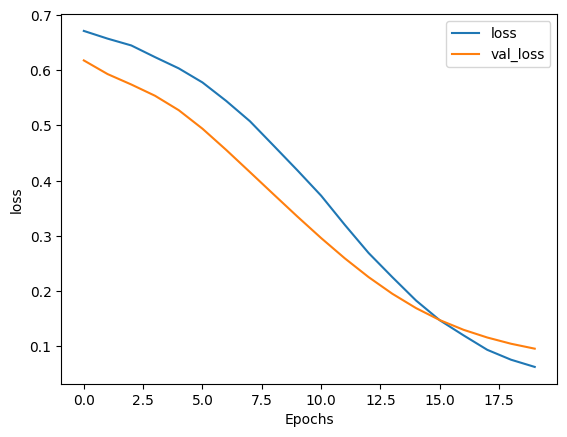

In [107]:
plot_graphs(history, 'loss')

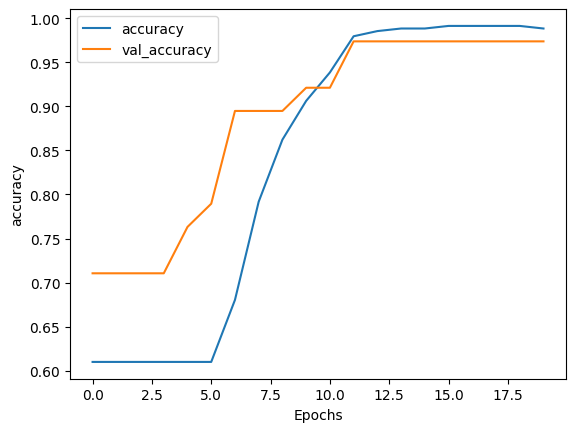

In [108]:
plot_graphs(history, 'accuracy')

In [ ]:
# 모델 학습 완료 후 가중치 저장
model.save_weights(os.path.join(checkpoint_dir, 'cnn_classifier_kr_weights.h5'))
print("Model weights saved at {}".format(os.path.join(checkpoint_dir, 'cnn_classifier_kr_weights.h5')))

Model weights saved at ./data_out/cnn_classifier_kr\cnn_classifier_kr_weights.h5


In [110]:
MAX_LEN

40

In [112]:
# 동일한 모델 아키텍처를 생성하고 가중치 로드
loaded_model = CNNClassifier(**kargs)
dummy_input = tf.random.uniform((1, MAX_LEN))
loaded_model(dummy_input)
loaded_model.load_weights(os.path.join(checkpoint_dir, 'cnn_classifier_kr_weights.h5'))
print("Model weights loaded from {}".format(os.path.join(checkpoint_dir, 'cnn_classifier_kr_weights.h5')))

Model weights loaded from ./data_out/cnn_classifier_kr\cnn_classifier_kr_weights.h5


In [115]:
clean_test_review = []
# 0: 영화추천 1: 일반 대화
# t = ['재밌는 영화 추천해줘'] 0
# t = ['봉준호 영화 추천해줘'] 0
# t = ['재밌는 거 추천해줘']  0
# t = ['달리기하다가 다쳤어'] 1
# t = ['배고픈데 뭐 먹을까?'] 1
# t = ['범죄도시라는 영화 봤는데 재밌더라'] 1
t = ['열린 결말의 영화 추천해줘'] #0
# t = ['비극적인 결말로 끝나는 영화 있어?'] # 0
# t = ['오늘 뭐 먹을까?'] 1

for review in t:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))

test_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [119]:
clean_test_review

[['열리다', '결말', '영화', '추천', '해주다']]

In [118]:
test_sequences

[[484, 239, 2, 1, 28]]

In [116]:
loaded_model.predict(test_inputs)

array([[0.01675721]], dtype=float32)

In [134]:
clean_test_review = []
# 0: 영화추천 1: 일반 대화
# t = ['재밌는 영화 추천해줘'] 0
# t = ['봉준호 영화 추천해줘'] 0
# t = ['재밌는 거 추천해줘']  0
# t = ['달리기하다가 다쳤어'] 1
# t = ['배고픈데 뭐 먹을까?'] 1
# t = ['범죄도시라는 영화 봤는데 재밌더라'] 1
# t = ['열린 결말의 영화 추천해줘'] 0
t = ['비극적인 결말로 끝나는 영화 있어?'] # 0
# t = ['오늘 뭐 먹을까?']

for review in t:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))


tokenizer.fit_on_texts(clean_test_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
# test_labels = np.array([0]) # 테스트 데이터의 라벨


In [135]:
print(test_inputs)
print(model.predict(test_inputs))
print(np.argmax(model.predict(test_inputs), axis=1))

[[ 4  5  6  7  8  9 10 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
[[0.9031821]]
[0]


In [ ]:
clean_test_review = []
# 0: 영화추천 1: 일반 대화
# t = ['재밌는 영화 추천해줘'] 0
# t = ['봉준호 영화 추천해줘'] 0
# t = ['재밌는 거 추천해줘']  0
# t = ['달리기하다가 다쳤어'] 1
# t = ['배고픈데 뭐 먹을까?'] 1
# t = ['범죄도시라는 영화 봤는데 재밌더라'] 1
# t = ['열린 결말의 영화 추천해줘'] 0
# t = ['비극적인 결말로 끝나는 영화 있어?'] 0
t = ['비극적인 결말로 끝나는 영화 있어?']

for review in t:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))

test_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
test_inputs

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# 추론 과정

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import json
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
class CNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [36]:
DATA_IN_PATH = './data_in/'
model_name = 'cnn_classifier_kr'
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
prepro_configs = json.load(open(DATA_IN_PATH + 'data_configs.json', 'r'))

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

okt=Okt()

In [37]:
with open('data_out/cnn_classifier_kr/vocab_list.pkl', 'rb') as f:
    d = pickle.load(f)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(d)

In [38]:
# 동일한 모델 아키텍처를 생성하고 가중치 로드
model = CNNClassifier(**kargs)
dummy_input = tf.random.uniform((1, 40))
model(dummy_input)
model.load_weights('data_out/cnn_classifier_kr/cnn_classifier_kr_weights.h5')
# model.load_weights('C:\\Users\\fkfma\\Desktop\\국비교육-AI웹서비스\\FinalProject\\data_out\\cnn_classifier_kr\\weights.h5')

In [41]:
clean_test_review = []
# 0: 영화추천 1: 일반 대화
# t = ['오늘 뭐 먹을까?'] 1
# t = ['호러 영화 추천해줘']# 0
# t = ['졸리다'] # 1
t = ['밥 먹을래?', '졸리다'] # 1

def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    word_review = okt.morphs(review_text, stem=True)
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

for review in t:
    print('re',review)
    if type(review) == str: # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
print(clean_test_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(test_sequences, maxlen=40, padding='post') # 테스트 데이터를 벡터화
print(model.predict(test_inputs))
(model.predict(test_inputs) > 0.5).astype(np.int32)

re 밥 먹을래?
re 졸리다
[['밥', '먹다'], ['졸리', '다']]
[[0.7967712 ]
 [0.83260447]]


array([[1],
       [1]])

In [21]:
for r in t:
    print(r)

밥 먹을래?


In [25]:
clean_test_review

[['호러', '영화', '추천', '해주다']]

In [11]:
test_sequences

[[252, 2, 1, 28]]

In [12]:
test_inputs

array([[252,   2,   1,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

# 시놉시스 분리

In [104]:
df = pd.read_excel('moviesdata0808.xls', index_col=False, names=['영화명','평점','개봉연도','상영시간','연령','감독','출연','시놉시스','장르'])
a = 78
print(df.시놉시스[a])
df.loc[a]

소개단 것이라면 질색하면서 손님이 대부분 여자라는 어이없는 이유로 케이크 가게를 오픈한 엉뚱한 사장 ‘진혁’ (주지훈). 뜬금없이 한적한 주택가 골목에 자리잡은 것도 모자라 몇 백만 원짜리 앤틱 식기에 케이크를 담아 내오고 새벽 2시까지 영업을 하는 별난 케이크숍 ‘앤티크’를 차린 후, 진혁은 케이크의 맛을 책임져줄 인물로 천재 파티쉐 ‘선우’ (김재욱)를 영입한다. 그런데 선우는 하필이면 고교시절 진혁에게 사랑을 고백해왔던 껄끄러운 동창생! 거기다 누구나 첫눈에 반하게 만드는 ‘마성의 게이’로 180도 변신해 끊임없이 남자 문제를 일으키는 통에 몇 달째 직원조차 구하기 힘들다. 결국 선우의 케이크 맛에 홀딱 반한 케이크광 ‘기범’이 주방 보조이자 견습생으로 들어오고, 진혁을 도련님이라고 부르며 그림자처럼 따라다니는 진혁의 보디가드 ‘수영’ (최지호)이 서빙을 맡게 된다. 네 남자가 모여 마침내 본격적인 영업을 시작한 앤티크. 그런데 이 네 남자, 멀쩡한 겉모습들과는 달리 무언가 수상하다!? 마성의 게이로 이름을 날리며 남자들과는 거침없이 복잡한 연애를 즐기는 선우가 어찌된 일인지 여자 앞에만 서면 벌벌 떠는 심각한 여성공포증이 있고, 곱상한 외모와는 달리 몹시 거친 성격의 기범은 알고 보니 최연소 동양챔피언이었던 전직 복서. 게다가 몸짱 보디가드 수영은 건장한 외모가 무색한 어리버리 사고뭉치로 오히려 진혁의 보살핌을 받고 있다. 그리고 제일 의뭉스런 일은 평소엔 수다스럽고 익살스런 호색한 진혁이 가족만 나타나면 품행 방정하고 착하디 착한 재벌 2세 도련님으로 대변신을 하는 것인데..! 겉만 보곤 도저히 알 수 없는 알쏭달쏭 네 남자, 다들 무슨 속사정인 걸까? 모델 뺨치는 외모의 사장과 점원이 서빙을 하고, 마성의 게이인 천재 파티쉐가 케이크를 만들고, 전직 복싱 챔피언이 주방보조인 별난 케이크숍 ‘앤티크’달콤한 네 남자의 아찔한 비밀을 둘러싸고 웃음과 감동의 드라마가 펼쳐진다!


영화명                                          서양골동양과자점 앤티크
평점                                                   8.21
개봉연도                                                 2008
상영시간                                                 111분
연령                                                15세 관람가
감독                                                    민규동
출연      주지훈, 김재욱, 유아인, 최지호, 앤디 질렛, 김창완, 이휘향, 오미희, 남명렬,...
시놉시스    소개단 것이라면 질색하면서 손님이 대부분 여자라는 어이없는 이유로 케이크 가게를 오...
장르                                                코미디,드라마
Name: 78, dtype: object

In [ ]:
"사회적 메시지가 있는 영화 추천해 주세요."
"고전 문학을 바탕으로 한 영화 추천 부탁드립니다."
"초자연적인 요소가 있는 영화 추천 부탁드립니다."
"정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다."
"감정 이입이 잘 되는 영화 추천 부탁드립니다."
"사회적 이슈를 다룬 강렬한 드라마 추천해 주세요."
"가족의 사랑을 그린 따뜻한 영화 추천해 주세요"
"숨겨진 명작 영화 추천 부탁드립니다"

In [ ]:
def m(x):
    if '코난' in str(x):
        print(x)
    return x
df.영화명.apply(m)

In [32]:
print(df[df['영화명'] == '극장판 짱구는 못말려 24기 - 폭풍수면! 꿈꾸는 세계 대돌격']['시놉시스'].values)

['소개어느 날, 꿈 속에서 거대한 물고기가 나타나 짱구 가족을 한 입에 삼킨 날로부터 마을 사람들은 모두 잠을 잘 때마다 보고 싶은 꿈을 꾸는 신기한 꿈의 세계로 가게 된다. 하지만 짱구의 유치원에 ‘보라’가 전학 온 후, 마을 사람들이 꿈꾸는 세계는 점차 악몽으로 변해가고 사람들은 무시무시한 악몽 속으로 빨려 들어가게 된다. 짱구와 떡잎마을 방위대는 새롭게 전학 온 보라가 꿈의 세계 속 비밀을 간직하고 있다는 것을 알게 되고, 마을 사람들과 보라를 위해 악몽과의 한판 대결을 시작하는데…']


In [6]:
len(synopsis_text), len(recom)

(75, 203)

In [109]:
df1 = pd.DataFrame(recom)
df2 = pd.DataFrame(synopsis_text)
df1['label'] = 0
df2['label'] = 1
df = pd.concat([df1,df2])
data = df.sample(frac=True).reset_index(drop=True)
data.columns = ['q','label']
data

,q,label
0,사랑과 우정이 동시에 그려진 영화 추천 부탁드립니다.,0
1,정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다.,0
2,주인공이 강력한 여성인 영화 추천해 주세요.,0
3,도박으로 인생 역전을 꿈꾸는 소녀가 가족을 잃으며 사건현장에서 발견한 포커 카드로 ...,1
4,최신 영화 추천해줘,0
...,...,...
279,세상의 마지막 날에 우연한 만남을 계기로 마지막을 함께하는 내용의 영화가 있으면 추천해줘,1
280,정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다.,0
281,비극적인 이야기지만 아름다운 영화 추천 부탁드립니다.,0
282,사랑을 다룬 다양한 시각의 영화 추천해 주세요.,0


In [150]:
da = []
for d in range(data.shape[0]):
    da.append((data.iloc[d]['q'], data.iloc[d]['label']))
da[0]

('여행을 떠나고 싶게 만드는 영화 추천 부탁드립니다.', 0)

In [155]:
data['q'].to_list

0         여행을 떠나고 싶게 만드는 영화 추천 부탁드립니다.
1       전쟁나서 사람들이 피난가는 줄거리의 영화를 추천해줄래?
2              사회적 메시지가 있는 영화 추천해 주세요.
3                     대부분이 좋아하는 영화 알려줘
4            실험적인 형식을 가진 영화 추천 부탁드립니다.
                    ...               
279         초자연적인 요소가 있는 영화 추천 부탁드립니다.
280            우주를 배경으로 한 영화 추천 부탁드려요.
281       가장 재미있는 판타지 애니메이션 추천 부탁드립니다.
282    사랑에 관한 다양한 시각을 다룬 영화 추천 부탁드립니다.
283             재미있는 다큐멘터리 영화 추천해 주세요!
Name: q, Length: 284, dtype: object

In [ ]:
texts, labels = zip(*da) # 데이터 처리

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

maxlen = 40
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels) # 넘파이로 변환

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

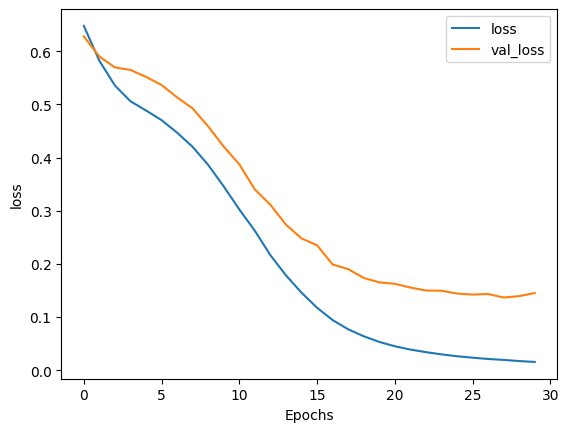

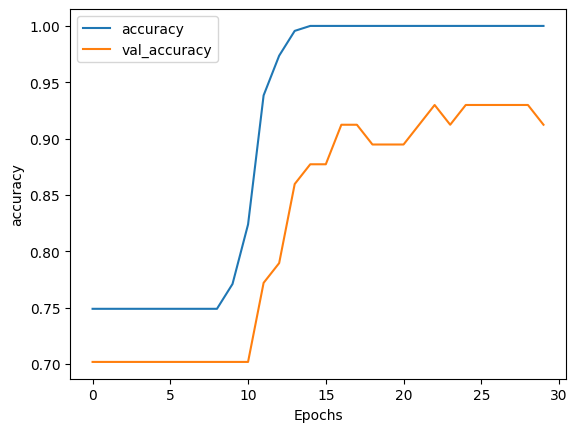

In [152]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [158]:
model.save("text_classifier_model.h5")

loaded_model = tf.keras.models.load_model("text_classifier_model.h5")

new_texts = ["공포스러운 분위기의 영화 추천해 주세요.", "평범한 삶을 살던 주인공이 갑자기 초능력을 가지게 되는 이야기"]
new_texts = ["할로윈 데이에 살인사건이 일어나는 내용의 영화를 추천해줘.", '복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘']
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=maxlen)

predictions = loaded_model.predict(new_X)

# 결과 출력
for i, prediction in enumerate(predictions):
    label = "시놉시스" if prediction >= 0.5 else "일반적인 질문"
    print(f"문장: {new_texts[i]} -> 분류: {label} (확률: {prediction[0]:.2f})")


문장: 할로윈 데이에 살인사건이 일어나는 내용의 영화를 추천해줘. -> 분류: 시놉시스 (확률: 0.82)
문장: 복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘 -> 분류: 시놉시스 (확률: 0.84)


In [12]:
df1 = pd.DataFrame(recom)
df2 = pd.DataFrame(synopsis_text)
df1['label'] = 0
df2['label'] = 1
df = pd.concat([df1,df2])
data = df.sample(frac=True).reset_index(drop=True)
data.columns = ['q','label']
data

,q,label
0,여자 주인공이 멋진 영화 추천해 주세요.,0
1,가족 간의 갈등을 다룬 영화 추천 부탁드립니다.,0
2,정체성을 찾는 이야기를 다룬 영화 추천 부탁드립니다.,0
3,세상에서 가장 맛있는 아이스크림을 찾아 모험을 떠나는 내용의 영화를 추천해줘,1
4,기분 전환이 되는 코미디 영화 추천 부탁드립니다.,0
...,...,...
273,열린 결말의 영화를 추천해줘,0
274,전쟁을 다룬 감동적인 영화 추천 부탁드립니다.,0
275,음유시인과 전투광이 같이 여행하는 내용의 영화가 있어? 있으면 추천해줘,1
276,복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘,1


In [14]:
data.to_csv('tokenizer278.csv', index=False)

In [15]:
data = pd.read_csv('tokenizer278.csv')
da = []
for d in range(data.shape[0]):
    da.append((data.iloc[d]['q'], data.iloc[d]['label']))
texts, labels = zip(*da) # 데이터 처리
maxlen = 40
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)

loaded_model = tf.keras.models.load_model("text_classifier_model.h5")

new_texts = ["할로윈 데이에 살인사건이 일어나는 내용의 영화를 추천해줘.", '복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘']
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=maxlen)

predictions = loaded_model.predict(new_X)

# 결과 출력
for i, prediction in enumerate(predictions):
    label = "시놉시스" if prediction >= 0.5 else "일반적인 질문"
    print(f"문장: {new_texts[i]} -> 분류: {label} (확률: {prediction[0]:.2f})")

문장: 할로윈 데이에 살인사건이 일어나는 내용의 영화를 추천해줘. -> 분류: 시놉시스 (확률: 0.85)
문장: 복서와 게이의 극적인 만남으로 웃음과 감동으로 펼쳐지는 내용의 영화를 추천해줘 -> 분류: 일반적인 질문 (확률: 0.29)
